## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
col_list = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in col_list:
    diabetes_data[col].replace(to_replace=0,value=np.nan,inplace=True)



In [6]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002100B49F888>,
      dtype=object)

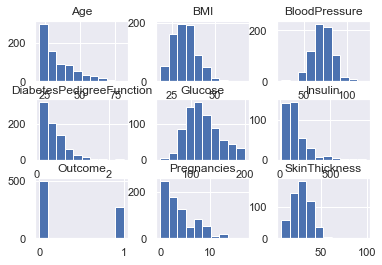

In [7]:
diabetes_data.hist()

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002100C532E88>,
      dtype=object)

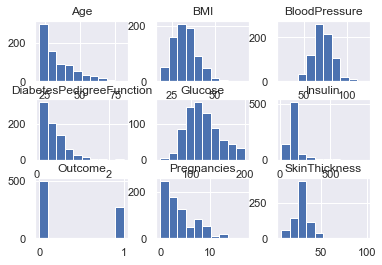

In [9]:
diabetes_data.hist()

#### Plot the correlation matrix heatmap

Correlation between various features


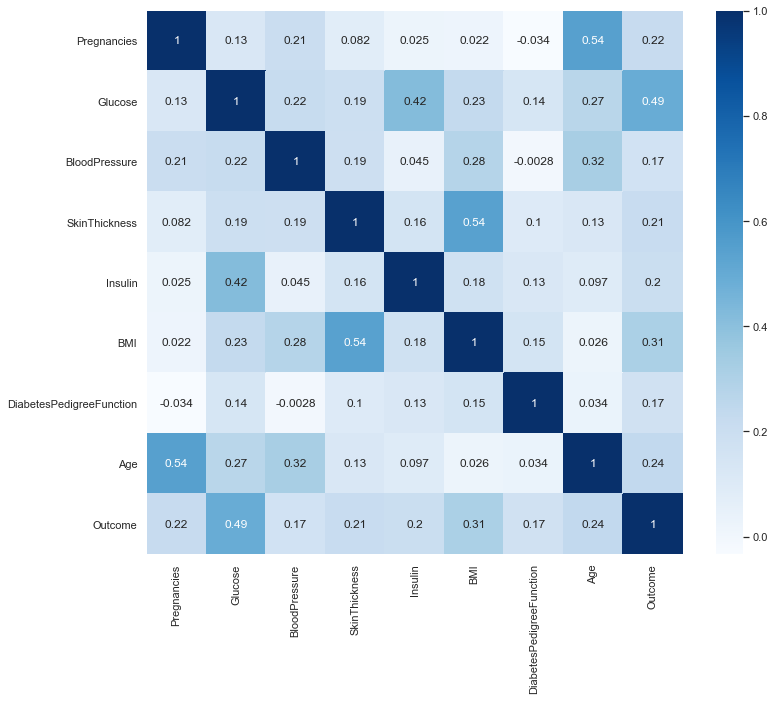

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
y = diabetes_data.Outcome
X = diabetes_data.drop('Outcome',axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [15]:
print(y_train)
print(y_test)

357    1
73     0
352    0
497    0
145    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 576, dtype: int64
668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.78910477, -1.18055612, ...,  0.24471229,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.32328202,  0.22578529, ...,  0.49207708,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.45637423, -0.68420033, ..., -0.22091555,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.04272157, -0.0223926 , ...,  0.18650881,
         0.77981801,  0.09377001],
       [-0.22446668, -1.45456583, -1.84236384, ..., -0.19181381,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.52292034, -0.0223926 , ..., -0.94845906,
        -0.77166568, -0.51505559]])

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [18]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [19]:
print(train_scores)
print(' ')
print(test_scores)

[1.0, 0.8402777777777778, 0.8489583333333334, 0.8298611111111112, 0.8229166666666666, 0.8142361111111112, 0.8125, 0.8107638888888888, 0.8142361111111112]
 
[0.6666666666666666, 0.6875, 0.6614583333333334, 0.6822916666666666, 0.6458333333333334, 0.671875, 0.671875, 0.6875, 0.703125]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

A k of 1 generated a score of 1 in the training dataset.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

A k of 9 generated the max score in the testing datset.

Plot the train and test model performance by number of neighbors.

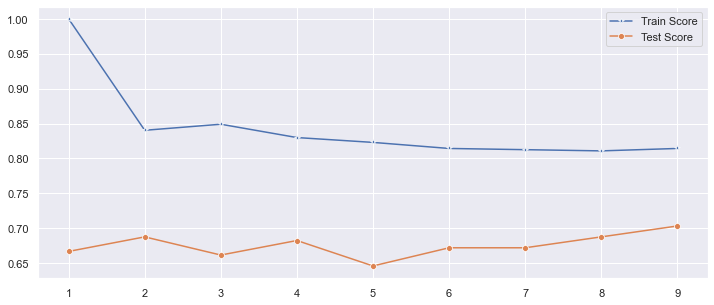

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
knn_best = KNeighborsClassifier(9)
knn_best.fit(X,y)
knn_best.score(X,y)

0.7799479166666666

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = knn_best.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [26]:
from sklearn.metrics import plot_confusion_matrix

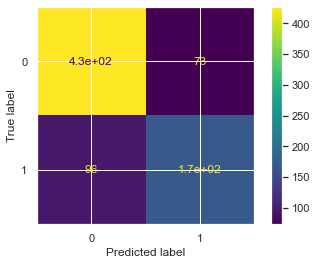

In [33]:
plot_confusion_matrix(knn_best,X,y)

**<font color='teal'> Print the classification report </font>**

In [35]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       123\n           1       0.66      0.65      0.66        69\n\n    accuracy                           0.76       192\n   macro avg       0.73      0.73      0.73       192\nweighted avg       0.75      0.76      0.75       192\n'

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [32]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
param_grid = {'n_estimators':np.arange(1,50)}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7735081911552498
Best Parameters: {'n_estimators': 16}
